# 非線形

## 多項式特徴量

<Axes: xlabel='horsepower', ylabel='mpg'>

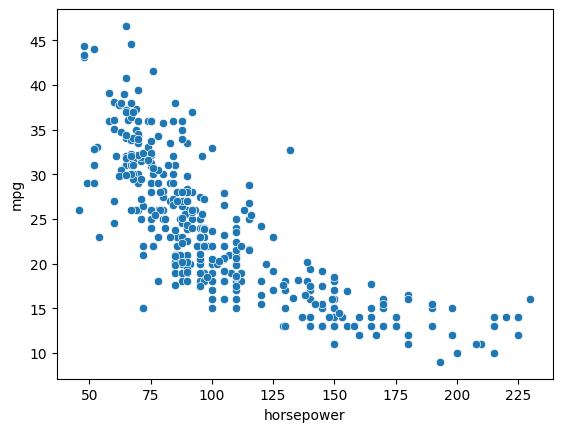

In [13]:
import seaborn as sns

df = sns.load_dataset('mpg')
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']

sns.scatterplot(x=df['horsepower'], y=df['mpg'])

# 多項式特徴量

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# degreeは高くても3
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X)

In [25]:
# 線形回帰

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [26]:
#　描画
import numpy as np
import matplotlib.pyplot as plt
x_axis = np.arange(50, 230).reshape(-1, 1)
x_axis_ = poly.fit_transform(x_axis)
pred = model.predict(x_axis_)

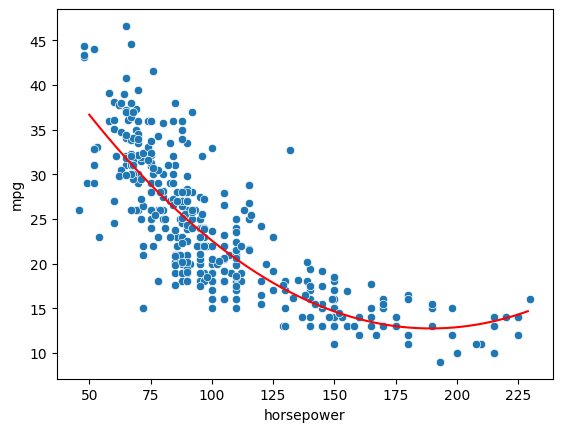

In [27]:
sns.scatterplot(x=df['horsepower'], y=df['mpg'])
plt.plot(x_axis, pred, 'r')

## 多項式回帰と線形回帰の精度を比較しよう

In [65]:
from sklearn.pipeline import Pipeline

In [70]:
from sklearn.model_selection import cross_val_score, RepeatedKFold

X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values


scores = {}

#線形回帰モデル
# model = LinearRegression()


#cv{
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)


for i in range(1, 4):
    
    #　多項式化
    # ploy = PolynomialFeatures(degree=i)
    # X_poly = ploy.fit_transform(X)
    
    pipline = Pipeline(steps = [
        ("poly", PolynomialFeatures(degree=i)),
        ("model", LinearRegression())
    ])
    mses = cross_val_score(pipline, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

    #　全cvのmseの平均を格納
    mean_mse = -np.mean(mses)
    std = np.std(mses)
    scores[f"degree {i}"] = {"mean":mean_mse, "std":std}


In [71]:
import pandas as pd
pd.DataFrame(scores)

,degree 1,degree 2,degree 3
mean,24.235392,19.294970,19.433812
std,3.346678,4.413627,4.508224


## kNN回帰

<Axes: >

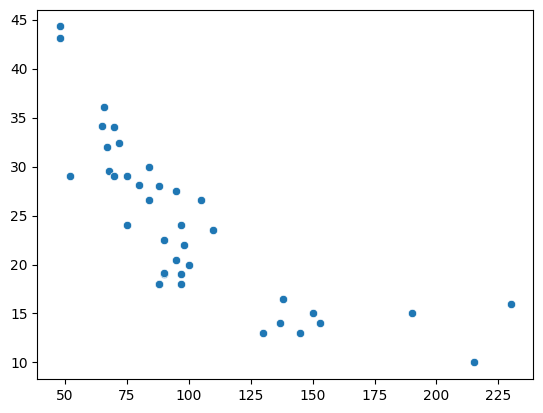

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(x=X_train[:, 0], y=y_train)

In [75]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=10)

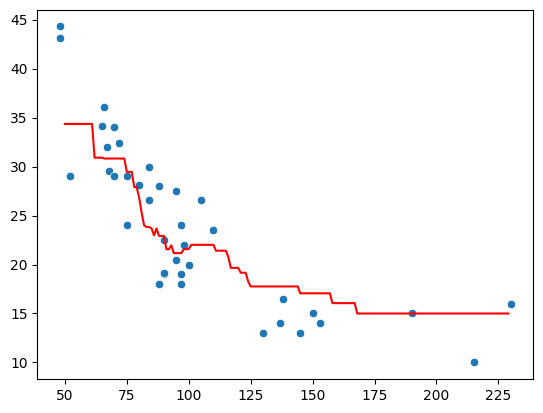

In [78]:
x_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(x_axis)

sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.plot(x_axis, y_pred, "r")

## 様々なkでkNNの精度を比較しよう

In [142]:
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 試行するKの最大数
k_list = np.arange(1, 31)

# 描画するx軸範囲
x_axis = np.arange(50, 230).reshape(-1, 1)

# 各kの結果を入れるdict
result_dict = {}

k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)

for k in k_list:
    
    # モデル
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mses = cross_val_score(model, X, y, cv=cv, scoring = "neg_mean_squared_error")
    result_dict[k] = -np.mean(mses)

Text(0, 0.5, '5fold vd error(MSE)')

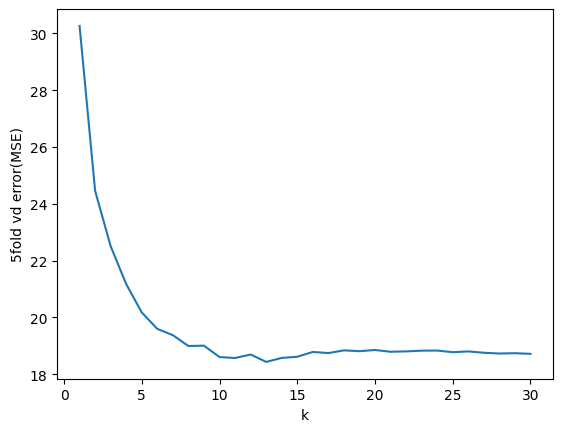

In [143]:
plt.plot(result_dict.keys(), result_dict.values())
plt.xlabel("k")
plt.ylabel("5fold vd error(MSE)")

In [149]:
score_list = list(result_dict.values())
print(f"Best performance: k={k_list[np.argmin(score_list)]}, cv error = {np.min(score_list)}")

Best performance: k=13, cv error = 18.43521544402385
